# Build the Neural Network

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

## Get Device for Training

In [2]:
device = torch.accelerator.current_accelerator(check_available=True)
device = device.type if torch.accelerator.is_available() else "cpu"

print(f"Using {device} device")

Using cuda device


## Define the Neural Network

In [7]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size=64*64, hidden_size=512, num_classes=10):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, num_classes),
        )
    def forward(self, x):
        x = self.flatten(x)
        print(x.shape)
        logits = self.linear_relu_stack(x)
        return logits

In [8]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=4096, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


## Visualize pytorch Model

torch.Size([1, 1, 64, 64])
torch.Size([1, 4096])


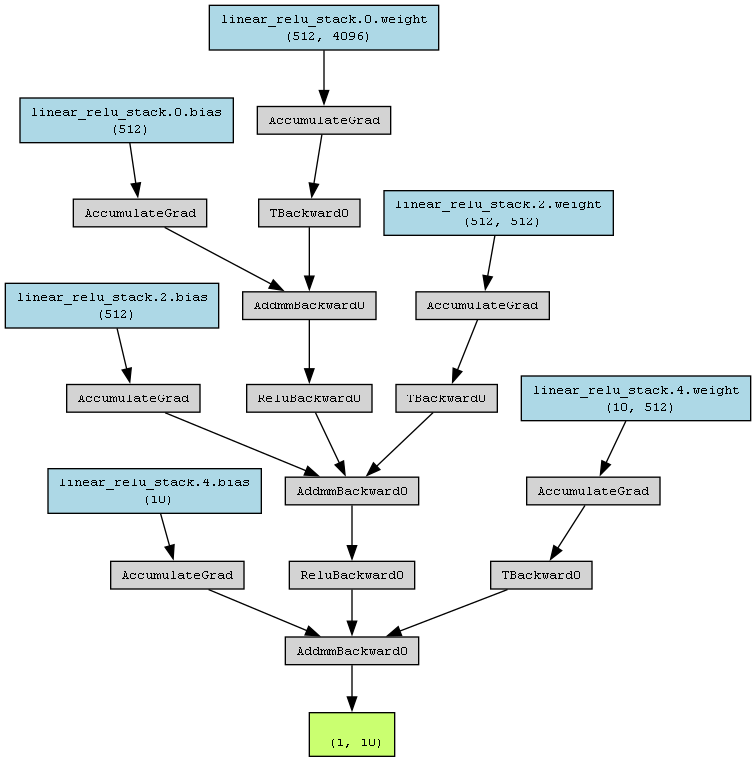

In [9]:
from torchviz import make_dot
from IPython.display import Image, display

dummy_input = torch.randn(1, 1, 64, 64, device=device).to(device)
print(dummy_input.shape)
dot = make_dot(model(dummy_input), params=dict(model.named_parameters()))
display(Image(dot.pipe(format='png')))